In [59]:
# %matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

In [86]:
def gen_fun(t:float):
    return np.where(np.logical_or(t < 0.2, t > 0.6), np.abs(0.3*np.sin(t*16*np.pi)+t*0.1), 0)

Text(0.5, 1.0, 'Generative Function')

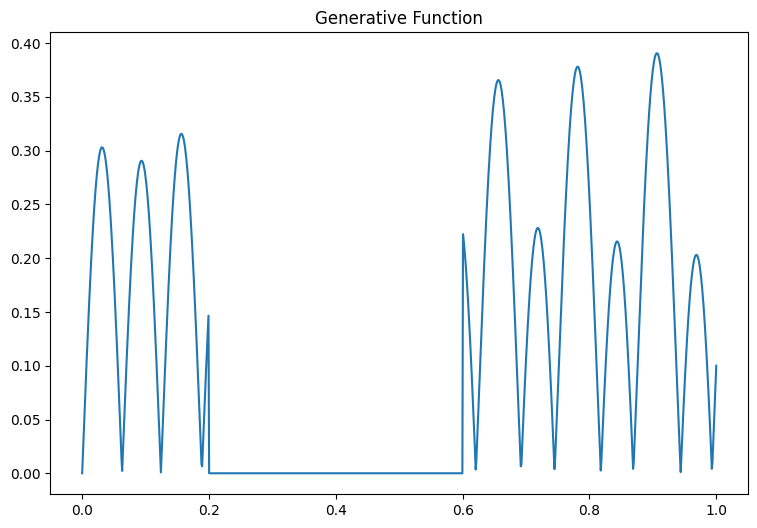

In [113]:
X = np.linspace(0,1, num=1000)
F = gen_fun(X)


plt.figure(figsize=(9,6))
plt.plot(X, F)
plt.title("Generative Function")

In [88]:
class CDF:
    def __init__(self, func_count:int, data):
        self.func_size = func_count
        self.bins = [0] * (func_count+1)
        self.data = data

        self.bins[0] = 0
        sum = 0
        for i in range(0, func_count):
            sum += data(i)
            self.bins[i+1] = sum

        self.integral = sum
        for i in range(0, func_count + 1):
            self.bins[i] /= sum

    @property
    def pdf(self):
        return np.diff(self.bins)
    
    def binary_search(self, u:float):
        first  = 0
        length = len(self.bins)

        while length > 0:
            half   = length // 2
            middle = first + half
            if self.bins[middle] <= u:
                first = middle + 1
                length -= half + 1
            else:
                length = half

        return first - 1
    
    def sample_discrete(self, u:float):
        off = self.binary_search(u)
        return (off, self.pdf[off])
    
    def pdf_discrete(self, x: int):
        return self.pdf[x]
    
    def sample_continous(self, u:float):
        off, pdf = self.sample_discrete(u)
        rem = (u - self.bins[off]) / pdf
        pos = (off + rem) / self.func_size
        return (pos, pdf * self.func_size)

    def pdf_continous(self, x:float):
        # x in [0, 1]
        off = int(x * self.func_size)
        return self.pdf_discrete(off) * self.func_size

Text(0.5, 1.0, 'Original CMF')

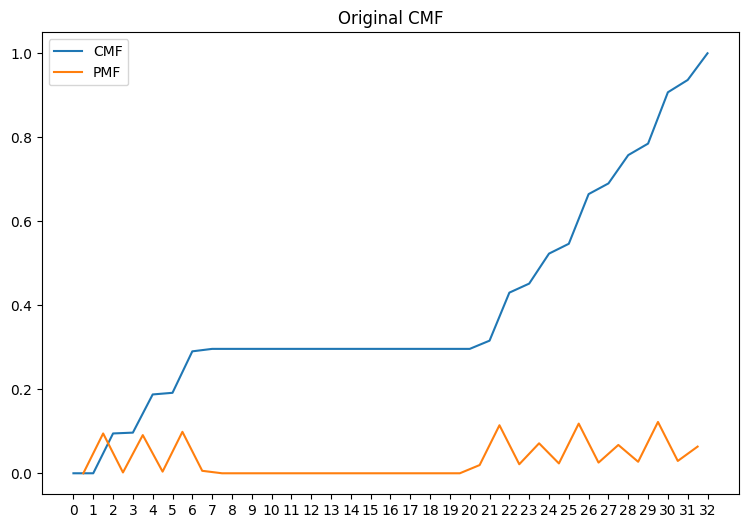

In [110]:
Bins = 32
cdf = CDF(Bins, lambda i: gen_fun(i/Bins))

plt.figure(figsize=(9,6))
plt.plot(cdf.bins)
plt.plot([0.5+i for i in range(0, cdf.func_size)], cdf.pdf)

plt.xticks(range(0, cdf.func_size + 1))
plt.legend(["CMF", "PMF"])
plt.title("Original CMF")

Text(0.5, 1.0, 'Discrete Sampling')

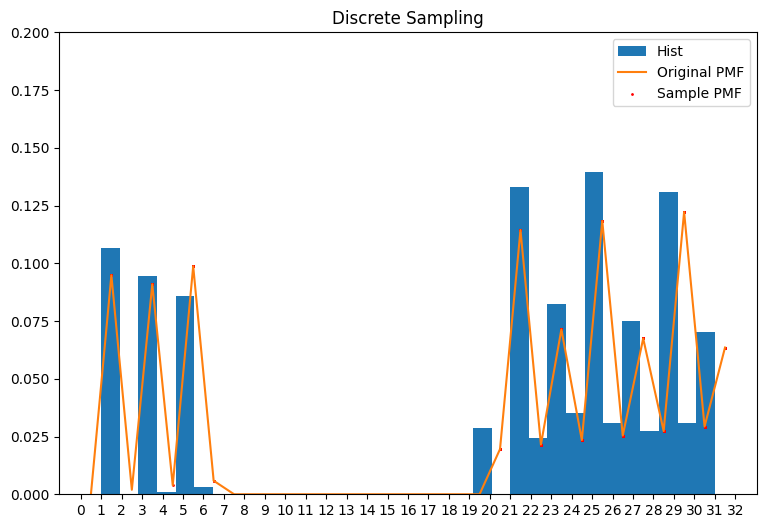

In [111]:
discrete_samples = []
discrete_pdfs = []
for i in range(0, 1000):
    off, pdf = cdf.sample_discrete(np.random.uniform())
    discrete_samples.append(off)
    discrete_pdfs.append(pdf)
    
plt.figure(figsize=(9,6))
plt.hist(discrete_samples, density=True, bins=cdf.func_size+1, label="Hist")
plt.plot([0.5+i for i in range(0, cdf.func_size)], cdf.pdf, label="Original PMF")
plt.scatter(np.asarray(discrete_samples)+0.5, discrete_pdfs, s=1, c="r", label="Sample PMF")

plt.ylim([0, 0.2])
plt.xticks(range(0, cdf.func_size + 1))
plt.legend()
plt.title("Discrete Sampling")

Text(0.5, 1.0, 'Continous Sampling')

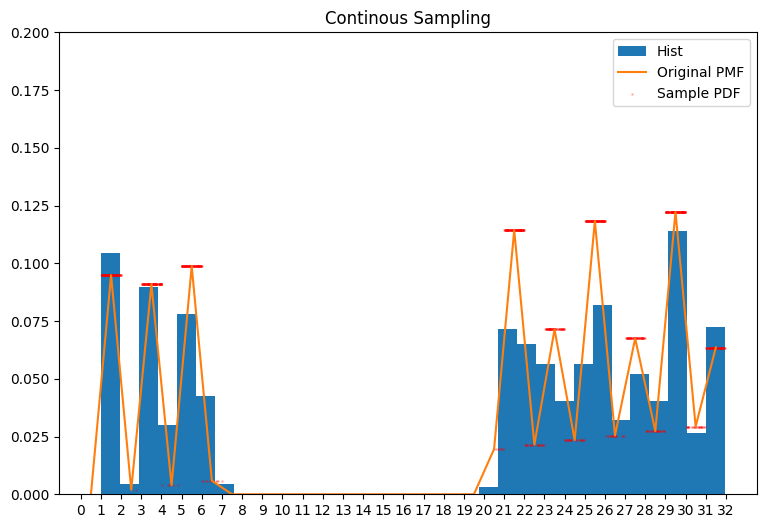

In [112]:
continous_samples = []
continous_pdfs = []
for i in range(0, 1000):
    p, pdf = cdf.sample_continous(np.random.uniform())
    continous_samples.append(p*cdf.func_size)
    continous_pdfs.append(pdf/cdf.func_size)

plt.figure(figsize=(9,6))
plt.hist(continous_samples, density=True, bins=cdf.func_size+1, label="Hist")
plt.plot([0.5+i for i in range(0, cdf.func_size)], cdf.pdf, label="Original PMF")
plt.scatter(continous_samples, continous_pdfs, s=1, c="r", alpha=0.2, label="Sample PDF")

plt.ylim([0, 0.2])
plt.xticks(range(0, cdf.func_size + 1))
plt.legend()
plt.title("Continous Sampling")